In [41]:
import pandas as pd
import numpy as np
print(np.__version__)
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.api import  SimpleExpSmoothing, Holt,ExponentialSmoothing
import warnings
warnings.filterwarnings('ignore')

1.24.4


In [42]:
df = pd.read_csv(r'D:\workspace\MachineLearning\Datasets\Datasets\monthly-milk-production-pounds-p.csv', index_col=0)

In [43]:
y = df['Milk']
y_train = y.iloc[:-12]
y_test = y.iloc[-12:]
y_train.shape, y_test.shape

((156,), (12,))

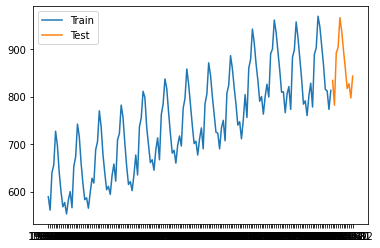

In [44]:
plt.plot(y_train, label='Train')
plt.plot(y_test, label='Test')
plt.legend()
plt.show()

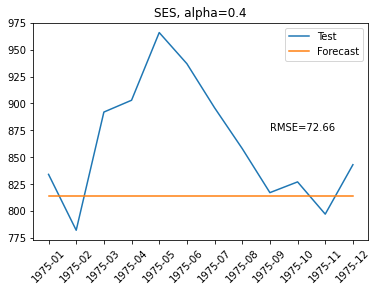

In [45]:
alpha=0.4
ses = SimpleExpSmoothing(y_train)
fit1 = ses.fit(smoothing_level=alpha)
y_pred = fit1.forecast(len(y_test))
y_pred.index = y_test.index
plt.plot(y_test, label="Test")
plt.plot(y_pred, label="Forecast")
error = np.round(np.sqrt(mean_squared_error(y_test, y_pred)),2)
plt.text(8,875, "RMSE="+str(error))
plt.title('SES, alpha='+str(alpha))
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [46]:
alphas = np.linspace(0.01, 1, 100)
error = []
for alpha in alphas:
    ses = SimpleExpSmoothing(y_train)
    fit1 = ses.fit(smoothing_level=alpha)
    y_pred = fit1.forecast(len(y_test))
    y_pred.index = y_test.index
    error.append([alpha,np.round(np.sqrt(mean_squared_error(y_test, y_pred)),2)])

error_df = pd.DataFrame(error, columns=['alpha', 'error'])
error_df.sort_values('error')


,alpha,error
8,0.09,56.95
7,0.08,56.98
9,0.10,57.02
10,0.11,57.17
6,0.07,57.18
...,...,...
66,0.67,79.13
65,0.66,79.14
64,0.65,79.14
1,0.02,84.49


In [47]:
alphas = np.linspace(0.01, 1, 100)
betas = np.linspace(0.01, 1, 100)
error = []
for alpha in alphas:
    for beta in betas:
        holt = Holt(y_train)
        fit1 = holt.fit(smoothing_level=alpha, smoothing_trend=beta)
        y_pred = fit1.forecast(len(y_test))
        y_pred.index = y_test.index
        error.append([alpha,beta,np.round(np.sqrt(mean_squared_error(y_test, y_pred)),2)])

error_df = pd.DataFrame(error, columns=['alpha','beta', 'error'])


In [48]:
error_df.sort_values('error')

,alpha,beta,error
670,0.07,0.71,52.76
584,0.06,0.85,52.78
669,0.07,0.70,52.78
159,0.02,0.60,52.79
585,0.06,0.86,52.79
...,...,...,...
2199,0.22,1.00,605.06
2099,0.21,1.00,606.79
100,0.02,0.01,616.43
1,0.01,0.02,844.20


In [49]:
alphas = np.linspace(0.01, 0.9, 20)
betas = np.linspace(0.01, 0.9, 20)
phi = np.linspace(0.01, 0.9, 20)
error = []
for alpha in alphas:
    for beta in betas:
        for ph in phi:
            holt = Holt(y_train, damped_trend=True)
            fit1 = holt.fit(smoothing_level=alpha, smoothing_trend=beta, damping_trend=ph)
            y_pred = fit1.forecast(len(y_test))
            y_pred.index = y_test.index
            error.append([alpha,beta,ph,np.round(np.sqrt(mean_squared_error(y_test, y_pred)),2)])

error_df = pd.DataFrame(error, columns=['alpha','beta','phi', 'error'])


In [50]:
error_df.sort_values('error',ascending=True)

,alpha,beta,phi,error
7995,0.900000,0.900000,0.712632,54.64
359,0.010000,0.806316,0.900000,54.66
339,0.010000,0.759474,0.900000,54.67
379,0.010000,0.853158,0.900000,54.67
399,0.010000,0.900000,0.900000,54.70
...,...,...,...,...
2759,0.291053,0.806316,0.900000,248.62
1999,0.197368,0.900000,0.900000,256.84
2359,0.244211,0.806316,0.900000,259.94
2379,0.244211,0.853158,0.900000,270.22


In [51]:
alphas = np.linspace(0.01, 0.9, 20)
betas = np.linspace(0.01, 0.9, 20)
phi = np.linspace(0.01, 0.9, 20)
scores = []
for alpha in alphas:
    for beta in betas:
        for ph in phi:
            hw_add = ExponentialSmoothing(y_train,seasonal_periods=12, trend='add', seasonal='add')
            fit1 = hw_add.fit(smoothing_level=alpha, smoothing_trend=beta, damping_trend=ph)
            y_pred = fit1.forecast(len(y_test))
            # y_pred.index = y_test.index
            scores.append([alpha,beta,ph,np.round(np.sqrt(mean_squared_error(y_test, y_pred)),2)])

scores_df = pd.DataFrame(error, columns=['alpha','beta','gamma', 'error'])


In [52]:
scores_df.sort_values('error')

,alpha,beta,gamma,error
7995,0.900000,0.900000,0.712632,54.64
359,0.010000,0.806316,0.900000,54.66
339,0.010000,0.759474,0.900000,54.67
379,0.010000,0.853158,0.900000,54.67
399,0.010000,0.900000,0.900000,54.70
...,...,...,...,...
2759,0.291053,0.806316,0.900000,248.62
1999,0.197368,0.900000,0.900000,256.84
2359,0.244211,0.806316,0.900000,259.94
2379,0.244211,0.853158,0.900000,270.22


In [53]:
alphas = np.linspace(0.01, 0.9, 20)
betas = np.linspace(0.01, 0.9, 20)
phi = np.linspace(0.01, 0.9, 20)
scores = []
for alpha in alphas:
    for beta in betas:
        for ph in phi:
            hw_add = ExponentialSmoothing(y_train,seasonal_periods=12, trend='add', seasonal='mul')
            fit1 = hw_add.fit(smoothing_level=alpha, smoothing_trend=beta, damping_trend=ph)
            y_pred = fit1.forecast(len(y_test))
            # y_pred.index = y_test.index
            scores.append([alpha,beta,ph,np.round(np.sqrt(mean_squared_error(y_test, y_pred)),2)])

scores_df = pd.DataFrame(error, columns=['alpha','beta','gamma', 'scores'])


In [54]:
scores_df.sort_values('scores')

,alpha,beta,gamma,scores
7995,0.900000,0.900000,0.712632,54.64
359,0.010000,0.806316,0.900000,54.66
339,0.010000,0.759474,0.900000,54.67
379,0.010000,0.853158,0.900000,54.67
399,0.010000,0.900000,0.900000,54.70
...,...,...,...,...
2759,0.291053,0.806316,0.900000,248.62
1999,0.197368,0.900000,0.900000,256.84
2359,0.244211,0.806316,0.900000,259.94
2379,0.244211,0.853158,0.900000,270.22
